In [2]:
import pandas as pd
import numpy as np

In [2]:
cmm_donations = pd.read_csv("../MSM_python/CMM_Donations.csv")

In [3]:
maneater_donations = pd.read_csv("../MSM_python/maneater_donors.csv")

In [4]:
maneater_donations.head()

,PREF_NAME_SORT,TOTAL_GIVING,Gift,Scholarship,LAST_GIFT_DATE,PREF_EMAIL_ADDRESS
0,"SCOTT,DAVID,THORNHILL",1500,1500.0,NaN,4/7/2021 0:00:00 A4P4,dtscott@gmail.com
1,"KUBATZKY,KATHERINE,REBECCA",100,100.0,NaN,3/25/2021 0:00:00 A3P3,kathy_kerr2001@yahoo.com
2,"SENDERLING-MCDONALD,CATHERINE,ELAINE",2375,2150.0,225.0,2/16/2022 0:00:00 A2P2,Csend@cwda.org
3,"BARRIENTOS,TANYA,MARIA",200,200.0,NaN,12/17/2015 0:00:00 A12P12,tanya.barrientos@gmail.com
4,"GOTH SIMMONS,TONYA,S.",20,NaN,20.0,10/10/2005 0:00:00 A10P10,gothsimmons@gmail.com


In [5]:
cmm_donations.head()

,NAME,EMAIL,TOTAL_GIVING,grad_year,deg_school,max_degree,MU_max_degree,current_city,current_state
0,Mr. Patrick N. Strawbridge,pnstrawbridge@gmail.com,1000.0,1997.0,UMC,JD,No,NaN,ME
1,Ms. Erica Endicott,erica@ericaendicott.com,1000.0,2003.0,UMC,Bachelors,Yes,Atlanta,GA
2,Mr. David T. Scott,dtscott@gmail.com,1000.0,1999.0,UMC,Bachelors,Yes,New York City,NY
3,Mr. Richard O'Dell,rao44@yahoo.com,1000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Ms. Katie Buehler,katiebuehler20@gmail.com,1000.0,NaN,UMC,Bachelors,Yes,Dallas,TX


### All data analysis

In [8]:
full_donations = pd.read_csv("../MSM_python/alldonations.csv")

In [9]:
full_donations.head()

,FULL_NAME,NAME_WITH_MIDDLE,FIRST_NAME,LAST_NAME,EMAIL_2,LAST_GIFT_DATE,grad_year,deg_school,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
0,MARY ABBOTT,MARY LU ABBOTT,MARY,ABBOTT,maryluabbott@aol.com,6/3/08 0:00,NaN,NaN,NaN,NaN,NaN,NaN,500,0,0,500,Tier C ($200-$599),2008
1,NOAH ADAMS,NOAH ADAMS,NOAH,ADAMS,noah.thomas.adams@gmail.com,3/23/21 0:00,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,0,Low Tier (Under $75),2021
2,NEIL AMDUR,NEIL LESTER AMDUR,NEIL,AMDUR,neil_amdur@yahoo.com,12/29/15 0:00,NaN,NaN,NaN,NaN,NaN,NaN,25,0,25,0,Low Tier (Under $75),2015
3,JENNIFER AMUR,JENNIFER AYSE AMUR,JENNIFER,AMUR,NaN,10/10/05 0:00,NaN,NaN,NaN,NaN,NaN,NaN,70,0,0,70,Low Tier (Under $75),2005
4,BRIAN ARBUCKLE,BRIAN WILLIAM ARBUCKLE,BRIAN,ARBUCKLE,arbuckle_brian@hotmail.com,2/5/08 0:00,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,25,Low Tier (Under $75),2008


In [30]:
full_donations['FULL_NAME'].value_counts()

KATIE YAEGER         1
MEGHAN CARNOT        1
META LEVIN           1
ELLIOT NJUS          1
JUSTIN MYERS         1
                    ..
PIERCE COURCHAINE    1
LARA KRAMER          1
MICHAEL POINTER      1
PATRICK PLAISANCE    1
JOHN HOWELL          1
Name: FULL_NAME, Length: 255, dtype: int64

In [31]:
full_donations[full_donations['FULL_NAME']=="DAMON KIESOW"]

,FULL_NAME,NAME_WITH_MIDDLE,FIRST_NAME,LAST_NAME,EMAIL_2,LAST_GIFT_DATE,grad_year,deg_school,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
131,DAMON KIESOW,DAMON MICHAEL KIESOW,DAMON,KIESOW,damon@kiesow.net,11/6/19 0:00,NaN,NaN,NaN,NaN,NaN,NaN,200,0,200,0,Tier C ($200-$599),2019


In [36]:
#all_donations['LAST_GIFT_DATE'] = pd.to_datetime(all_donations['LAST_GIFT_DATE'])
#all_donations['LAST_GIFT_DATE']

In [12]:
full_donations['LAST_GIFT_YEAR'] = full_donations['LAST_GIFT_YEAR'].astype(int)
full_donations['LAST_GIFT_YEAR'].value_counts()

2021    107
2008     34
2015     33
2005     17
2018     14
2017     13
2019     13
2020      8
2016      3
2022      3
0         2
2006      2
2011      2
2013      2
2010      1
2014      1
Name: LAST_GIFT_YEAR, dtype: int64

In [15]:
def donor_tier(donation):
    if donation > 1250:
        return "Tier A (Over $1250)"
    elif donation >= 600:
        return "Tier B ($600-$1250)"
    elif donation >= 200:
        return "Tier C ($200-$599)"
    elif donation >= 75:
        return "Tier D ($75-$199)"
    else:
        return "Low Tier (Under $75)"

<AxesSubplot:ylabel='Frequency'>

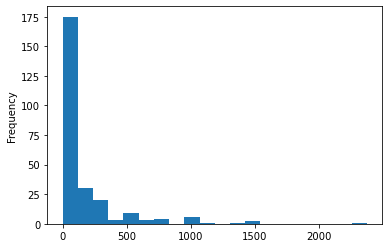

In [16]:
full_donations['TOTAL_GIVING'].plot.hist(bins=20)

In [17]:
full_donations['DONOR_TIER'] = full_donations['TOTAL_GIVING'].apply(donor_tier)

In [18]:
full_donations['DONOR_TIER'].value_counts()

Low Tier (Under $75)    127
Tier D ($75-$199)        61
Tier C ($200-$599)       49
Tier B ($600-$1250)      14
Tier A (Over $1250)       4
Name: DONOR_TIER, dtype: int64

<AxesSubplot:>

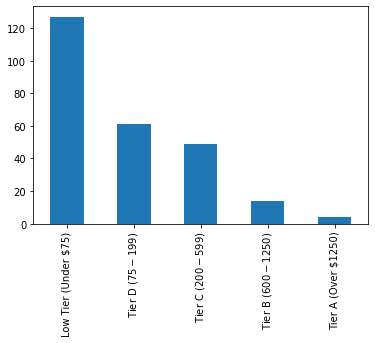

In [19]:
full_donations['DONOR_TIER'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

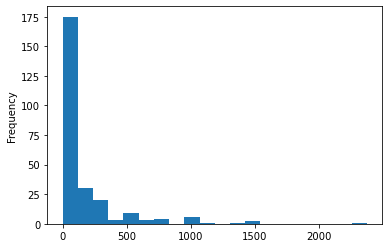

In [20]:
full_donations['TOTAL_GIVING'].plot.hist(bins=20)

In [21]:
full_donations = full_donations.reset_index()
# all_donations.to_csv('../MSM_python/alldonations.csv')

### College Media Madness 2021 Data

In [14]:
cmm_donations['TOTAL_GIVING'].value_counts()

100.0     19
25.0      15
10.0      10
20.0       9
50.0       8
1000.0     5
250.0      5
200.0      4
15.0       2
245.0      1
300.0      1
150.0      1
500.0      1
550.0      1
40.0       1
30.0       1
0.0        1
35.0       1
Name: TOTAL_GIVING, dtype: int64

In [15]:
def donor_tier(donation):
    if donation > 750:
        return "Tier A"
    elif donation >= 101:
        return "Tier B"
    elif donation >= 51:
        return "Tier C"
    else:
        return "Low Tier"

In [16]:
cmm_donations['donor_tier'] = cmm_donations['TOTAL_GIVING'].apply(donor_tier)

<AxesSubplot:>

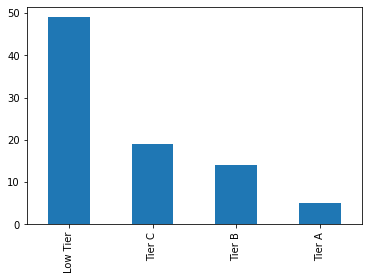

In [17]:
cmm_donations['donor_tier'].value_counts().plot.bar()

## Alumni Data

In [8]:
maneater_alum = pd.read_csv('../MSM_python/Maneater alumni list.csv')
kcou_alum = pd.read_csv('../MSM_python/KCOU alumni list.csv')
mutv_alum = pd.read_csv('../MSM_python/MUTV alumni list.csv')

In [318]:
full_alum.head()

,NAME_NO_MIDDLE,FIRST_NAME,LAST_NAME,ALUM_ORG,EMAIL
0,GRACE SANDS,GRACE,SANDS,MANEATER,gcsn8c@mail.missouri.edu
1,TARA MORTS,TARA,MORTS,MANEATER,tlmkkm@mail.missouri.edu
2,VICTORIA CHEYNE,VICTORIA,CHEYNE,MANEATER,torircheyne@hotmail.com
3,CHARLES SPERRY,CHARLES,SPERRY,MANEATER,yosquirt@mac.com
4,WILLIAM TAMMEUS,WILLIAM,TAMMEUS,MANEATER,wtammeus@gmail.com


In [316]:
full_alum['EMAIL'] = full_alum['EMAIL'].fillna("NOEMAIL")

In [122]:
full_alum['NAME_NO_MIDDLE'].value_counts().head(95)

QUINN RITZDORF      3
BECKY DIEHL         3
SIENA DEBOLT        3
MARK JOHNSON        3
BRIAHNA MARTIN      3
                   ..
HANNAH RODRIGUEZ    2
JACOB COOKSON       2
TASHFIA PARVEZ      2
THOMAS NEILL        1
TYRA MURRAY         1
Name: NAME_NO_MIDDLE, Length: 95, dtype: int64

In [107]:
alum_test = full_alum.groupby('NAME_NO_MIDDLE')

In [291]:
alum_test.head()

,NAME_NO_MIDDLE,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,TOTAL_OUTLETS
0,AAMER MADHANI,True,False,False,1
1,AARON CARTER,False,True,True,2
2,AARON CUMMINS,False,True,False,1
3,AARON LADD,False,False,True,1
4,AARON MORALES,True,False,False,1


### Dataframe Reconstruction for proper spreadsheet

In [325]:
alum_x['NAME_EMAIL'] = alum_x['NAME_NO_MIDDLE']+"|"+alum_x['EMAIL']

In [330]:
alum_x[alum_x['ALUM_ORG']=="MANEATER"]

,NAME_NO_MIDDLE,FIRST_NAME,LAST_NAME,ALUM_ORG,EMAIL,NAME_EMAIL
0,GRACE SANDS,GRACE,SANDS,MANEATER,gcsn8c@mail.missouri.edu,GRACE SANDS|gcsn8c@mail.missouri.edu
1,TARA MORTS,TARA,MORTS,MANEATER,tlmkkm@mail.missouri.edu,TARA MORTS|tlmkkm@mail.missouri.edu
2,VICTORIA CHEYNE,VICTORIA,CHEYNE,MANEATER,torircheyne@hotmail.com,VICTORIA CHEYNE|torircheyne@hotmail.com
3,CHARLES SPERRY,CHARLES,SPERRY,MANEATER,yosquirt@mac.com,CHARLES SPERRY|yosquirt@mac.com
4,WILLIAM TAMMEUS,WILLIAM,TAMMEUS,MANEATER,wtammeus@gmail.com,WILLIAM TAMMEUS|wtammeus@gmail.com
...,...,...,...,...,...,...
1181,BRYAN BLUMER,BRYAN,BLUMER,MANEATER,NOEMAIL,BRYAN BLUMER|NOEMAIL
1182,MARTIN GRIFFITH,MARTIN,GRIFFITH,MANEATER,NOEMAIL,MARTIN GRIFFITH|NOEMAIL
1183,MICHELLE ANDERSON,MICHELLE,ANDERSON,MANEATER,shewrites2@aol.com,MICHELLE ANDERSON|shewrites2@aol.com
1184,ANN SCHLUETER,ANN,SCHLUETER,MANEATER,aschluet23@gmail.com,ANN SCHLUETER|aschluet23@gmail.com


In [337]:
alum_x['ALUM_ORG'].value_counts()

MANEATER    1186
KCOU         398
MUTV         394
Name: ALUM_ORG, dtype: int64

In [372]:
alum_x['NAME_EMAIL'][0:1186] ## MANEATER ALUM

0          GRACE SANDS|gcsn8c@mail.missouri.edu
1           TARA MORTS|tlmkkm@mail.missouri.edu
2       VICTORIA CHEYNE|torircheyne@hotmail.com
3               CHARLES SPERRY|yosquirt@mac.com
4            WILLIAM TAMMEUS|wtammeus@gmail.com
                         ...                   
1181                       BRYAN BLUMER|NOEMAIL
1182                    MARTIN GRIFFITH|NOEMAIL
1183       MICHELLE ANDERSON|shewrites2@aol.com
1184         ANN SCHLUETER|aschluet23@gmail.com
1185          JANIS JONES|janisbjones@gmail.com
Name: NAME_EMAIL, Length: 1186, dtype: object

In [350]:
len(alum_x[0:1186]) ## MANEATER ALUM

1186

In [351]:
len(alum_x[1186:1584]) ## KCOU ALUM

398

In [349]:
len(alum_x[1584:]) ## MUTV ALUM

394

In [327]:
alum_email = alum_x['NAME_EMAIL']

In [329]:
alum_email.value_counts()

SIENA DEBOLT|sed4kk@mail.missouri.edu      3
BRIAHNA MARTIN|bmkk9@mail.missouri.edu     3
QUINN RITZDORF|qcrf2f@mail.missouri.edu    3
MARK JOHNSON|johnsmark@missouri.edu        3
BECKY DIEHL|diehlb@missouri.edu            3
                                          ..
LARRY POSTAER|lpostaer@rpa.com             1
STEPHEN SCOTT|sscott@scottlawfirm.com      1
JACKSON SEDIVY|jackson.seds@gmail.com      1
ANDREA MCMASTERS|NOEMAIL                   1
MAURA HEALY|maurah01@gmail.com             1
Name: NAME_EMAIL, Length: 1880, dtype: int64

In [367]:
alum_y = pd.DataFrame()

In [368]:
alum_y['alum_email'] = alum_email.unique()

In [369]:
alum_y.shape

(1881, 1)

In [437]:
def maneater_flag_x(ae):
    for x in alum_y['alum_email']:
        if x in maneater_emails:
            return True
        else:
            return False
#def mutv_flag(org):
#    if org == 1:
#        return True
#    else:
#        return False
#def kcou_flag(org):
#    if org == 1:
#        return True
#    else:
#        return False

In [457]:
maneater_emails = alum_x['NAME_EMAIL'][0:1186].astype(str)
kcou_emails = alum_x['NAME_EMAIL'][1186:1584].astype(str)
mutv_emails = alum_x['NAME_EMAIL'][1584:].astype(str)

In [458]:
#for x in alum_y['alum_email'] if x in maneater_emails alum_y['MANEATER_ALUM_FLAG']=True

In [461]:
alum_y['MANEATER_ALUM_FLAG']= [True if any(y in x for y in maneater_emails) else False for x in alum_y['alum_email'].fillna('X')] 
alum_y['KCOU_ALUM_FLAG']= [True if any(y in x for y in kcou_emails) else False for x in alum_y['alum_email'].fillna('X')] 
alum_y['MUTV_ALUM_FLAG']= [True if any(y in x for y in mutv_emails) else False for x in alum_y['alum_email'].fillna('X')] 

In [454]:
alum_y['alum_email']=alum_y['alum_email'].astype(str)

In [463]:
alum_y['MUTV_ALUM_FLAG'].value_counts()

False    1487
True      394
Name: MUTV_ALUM_FLAG, dtype: int64

In [467]:
alum_y[['NAME_NO_MIDDLE',"EMAIL"]]=alum_y['alum_email'].str.split('|', expand=True)

In [468]:
alum_y.head()

,alum_email,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,NAME_NO_MIDDLE,EMAIL
0,GRACE SANDS|gcsn8c@mail.missouri.edu,True,True,False,GRACE SANDS,gcsn8c@mail.missouri.edu
1,TARA MORTS|tlmkkm@mail.missouri.edu,True,False,False,TARA MORTS,tlmkkm@mail.missouri.edu
2,VICTORIA CHEYNE|torircheyne@hotmail.com,True,False,False,VICTORIA CHEYNE,torircheyne@hotmail.com
3,CHARLES SPERRY|yosquirt@mac.com,True,False,False,CHARLES SPERRY,yosquirt@mac.com
4,WILLIAM TAMMEUS|wtammeus@gmail.com,True,False,False,WILLIAM TAMMEUS,wtammeus@gmail.com


In [471]:
full_alum = alum_y[['NAME_NO_MIDDLE',"EMAIL",'MANEATER_ALUM_FLAG','KCOU_ALUM_FLAG','MUTV_ALUM_FLAG']]

In [472]:
full_alum

,NAME_NO_MIDDLE,EMAIL,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False
...,...,...,...,...,...
1876,RHONDA WATKINS,rcw998@mail.missouri.edu,False,False,True
1877,MARTISE HARRIS,martiseharris@hotmail.com,False,False,True
1878,MOLLY DOVE,molmoldove@yahoo.com,False,False,True
1879,ALEXANDER BOTHWELL,alexbothwell51@yahoo.com,False,False,True


### Alum Outlet Flag functions

In [361]:
def maneater_flag(org):
    if org == 1:
        return True
    else:
        return False
def mutv_flag(org):
    if org == 1:
        return True
    else:
        return False
def kcou_flag(org):
    if org == 1:
        return True
    else:
        return False

## Outlet Flags

In [269]:
alum_test['MANEATER_ALUM_FLAG'] = alum_test['MANEATER'].apply(maneater_flag)
alum_test['KCOU_ALUM_FLAG'] = alum_test['KCOU'].apply(kcou_flag)
alum_test['MUTV_ALUM_FLAG'] = alum_test['MUTV'].apply(mutv_flag)

In [283]:
# alum_test = alum_test[['NAME_NO_MIDDLE','MANEATER_ALUM_FLAG','KCOU_ALUM_FLAG','MUTV_ALUM_FLAG','TOTAL_OUTLETS']]

In [302]:
# alum_test['EMAIL'] = alum_test.lookup(alum_test['NAME_NO_MIDDLE'], full_alum['EMAIL'])

In [222]:
alum_test

,NAME_NO_MIDDLE,KCOU,MANEATER,MUTV
0,AAMER MADHANI,0,1,0
1,AARON CARTER,1,0,1
2,AARON CUMMINS,1,0,0
3,AARON LADD,0,0,1
4,AARON MORALES,0,1,0
...,...,...,...,...
1873,ZACHARY STRAUCH,1,0,0
1874,ZOE BRANCO,0,0,1
1875,ZOE LUNDSTRAM,0,0,1
1876,ZOE RICH,1,0,0


## FULL ALUM DATA COMPLETE

In [7]:
full_alum = pd.read_csv("../MSM_python/full_alum_data.csv")
full_alum.head()

,FULL_NAME,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False


In [11]:
full_alum[['FIRST_NAME','LAST_NAME']] = full_alum['FULL_NAME'].str.split(" ",n=1,expand=True)

In [12]:
full_alum

,FULL_NAME,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,FIRST_NAME,LAST_NAME
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False,GRACE,SANDS
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False,TARA,MORTS
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False,VICTORIA,CHEYNE
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False,CHARLES,SPERRY
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False,WILLIAM,TAMMEUS
...,...,...,...,...,...,...,...
1876,RHONDA WATKINS,rcw998@mail.missouri.edu,False,False,True,RHONDA,WATKINS
1877,MARTISE HARRIS,martiseharris@hotmail.com,False,False,True,MARTISE,HARRIS
1878,MOLLY DOVE,molmoldove@yahoo.com,False,False,True,MOLLY,DOVE
1879,ALEXANDER BOTHWELL,alexbothwell51@yahoo.com,False,False,True,ALEXANDER,BOTHWELL


In [544]:
#full_alum.to_csv('../MSM_python/full_alum_data.csv')

In [13]:
full_alum.to_excel('../MSM_python/full_alum_data.xlsx',index=False)

In [542]:
full_donations.head()

,FULL_NAME,FIRST_NAME,LAST_NAME,EMAIL,LAST_GIFT_DATE,grad_year,deg_school,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
0,MARY ABBOTT,MARY,ABBOTT,maryluabbott@aol.com,6/3/08 0:00,NaN,NaN,NaN,NaN,NaN,NaN,500,0,0,500,Tier C ($200-$599),2008
1,NOAH ADAMS,NOAH,ADAMS,noah.thomas.adams@gmail.com,3/23/21 0:00,NaN,NaN,NaN,NaN,NaN,NaN,10,10,10,0,Low Tier (Under $75),2021
2,NEIL AMDUR,NEIL,AMDUR,neil_amdur@yahoo.com,12/29/15 0:00,NaN,NaN,NaN,NaN,NaN,NaN,25,0,25,0,Low Tier (Under $75),2015
3,JENNIFER AMUR,JENNIFER,AMUR,NaN,10/10/05 0:00,NaN,NaN,NaN,NaN,NaN,NaN,70,0,0,70,Low Tier (Under $75),2005
4,BRIAN ARBUCKLE,BRIAN,ARBUCKLE,arbuckle_brian@hotmail.com,2/5/08 0:00,NaN,NaN,NaN,NaN,NaN,NaN,25,0,0,25,Low Tier (Under $75),2008


In [543]:
full_alum.head()

,FULL_NAME,EMAIL,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False


In [546]:
alums = full_alum['FULL_NAME']

In [548]:
donors = full_donations['FULL_NAME']

In [561]:
donor_emails = full_donations['EMAIL'].astype(str)

In [566]:
alum_donors= [True if any(y in x for y in donors) else False for x in alums.fillna('X')] 

In [567]:
sum(alum_donors)

102

In [569]:
full_donations.columns

Index(['FULL_NAME', 'FIRST_NAME', 'LAST_NAME', 'EMAIL', 'LAST_GIFT_DATE',
       'grad_year', 'deg_school', 'max_degree', 'MU_max_degree',
       'current_city', 'current_state', 'TOTAL_GIVING', 'cmm_py2', 'Gift',
       'Scholarship', 'DONOR_TIER', 'LAST_GIFT_YEAR'],
      dtype='object')

In [557]:
maneater_alum

,first_name,last_name,pref_email_address,alum_org,firstlast
0,Grace,Sands,gcsn8c@mail.missouri.edu,Maneater,GraceSands
1,Tara,Morts,tlmkkm@mail.missouri.edu,Maneater,TaraMorts
2,Victoria,Cheyne,torircheyne@hotmail.com,Maneater,VictoriaCheyne
3,Charles,Sperry,yosquirt@mac.com,Maneater,CharlesSperry
4,William,Tammeus,wtammeus@gmail.com,Maneater,WilliamTammeus
...,...,...,...,...,...
1181,Bryan,Blumer,NaN,Maneater,BryanBlumer
1182,Martin,Griffith,NaN,Maneater,MartinGriffith
1183,Michelle,Anderson,shewrites2@aol.com,Maneater,MichelleAnderson
1184,Ann,Schlueter,aschluet23@gmail.com,Maneater,AnnSchlueter


## MERGE Donations and Alumni

In [620]:
full_alum = pd.read_csv('../MSM_python/full_alum_data.csv')

In [621]:
full_alum.head()

,FULL_NAME,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG
0,GRACE SANDS,gcsn8c@mail.missouri.edu,True,True,False
1,TARA MORTS,tlmkkm@mail.missouri.edu,True,False,False
2,VICTORIA CHEYNE,torircheyne@hotmail.com,True,False,False
3,CHARLES SPERRY,yosquirt@mac.com,True,False,False
4,WILLIAM TAMMEUS,wtammeus@gmail.com,True,False,False


In [622]:
alumni_donor_merge = pd.merge(full_alum, full_donations, on= 'FULL_NAME',how='left')

In [623]:
alumni_donor_merge.shape

(1881, 22)

In [624]:
alumni_donor_merge.columns

Index(['FULL_NAME', 'EMAIL_1', 'MANEATER_ALUM_FLAG', 'KCOU_ALUM_FLAG',
       'MUTV_ALUM_FLAG', 'NAME_WITH_MIDDLE', 'FIRST_NAME', 'LAST_NAME',
       'EMAIL_2', 'LAST_GIFT_DATE', 'grad_year', 'deg_school', 'max_degree',
       'MU_max_degree', 'current_city', 'current_state', 'TOTAL_GIVING',
       'cmm_py2', 'Gift', 'Scholarship', 'DONOR_TIER', 'LAST_GIFT_YEAR'],
      dtype='object')

In [664]:
alumni_donor_merge['EMAIL_2'] = alumni_donor_merge['EMAIL_2'].replace(to_replace="0",value="NOEMAIL")
alumni_donor_merge['EMAIL_2'] = alumni_donor_merge['EMAIL_2'].fillna("NOEMAIL")

In [671]:
alumni_donor_merge.sort_values(by='TOTAL_GIVING',ascending=True)

,FULL_NAME,EMAIL_1,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,NAME_WITH_MIDDLE,FIRST_NAME,LAST_NAME,EMAIL_2,LAST_GIFT_DATE,...,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
343,ERIK PETERSEN,erikpetersen@mail.com,True,False,False,ERIK MICHAEL PETERSEN,ERIK,PETERSEN,erikpetersen@mail.com,3/21/18 0:00,...,NaN,NaN,NaN,NaN,10.0,0.0,10.0,0.0,Low Tier (Under $75),2018.0
598,DANIELA SIRTORI-CORTINA,dlsirtori@gmail.com,True,False,False,DANIELA LUCIA SIRTORI-CORTINA,DANIELA,SIRTORI-CORTINA,dlsirtori@gmail.com,3/21/17 0:00,...,NaN,NaN,NaN,NaN,10.0,0.0,10.0,0.0,Low Tier (Under $75),2017.0
474,DANIEL HORSEFIELD,deh@servantx.com,True,False,False,DANIEL E. HORSEFIELD,DANIEL,HORSEFIELD,deh@servantx.com,4/1/21 0:00,...,Bachelors,Yes,Oak Grove,MO,10.0,10.0,10.0,0.0,Low Tier (Under $75),2021.0
300,TYLER DAVIS,tyler.pete.davis@gmail.com,True,False,False,TYLER PETE DAVIS,TYLER,DAVIS,tyler.pete.davis@gmail.com,11/10/15 0:00,...,NaN,NaN,NaN,NaN,10.0,0.0,10.0,0.0,Low Tier (Under $75),2015.0
556,JEDD ROSCHE,NOEMAIL,True,False,False,JEDD MITCHELL ROSCHE,JEDD,ROSCHE,NOEMAIL,11/10/15 0:00,...,NaN,NaN,NaN,NaN,10.0,0.0,10.0,0.0,Low Tier (Under $75),2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,RHONDA WATKINS,rcw998@mail.missouri.edu,False,False,True,NaN,NaN,NaN,NOEMAIL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,MARTISE HARRIS,martiseharris@hotmail.com,False,False,True,NaN,NaN,NaN,NOEMAIL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,MOLLY DOVE,molmoldove@yahoo.com,False,False,True,NaN,NaN,NaN,NOEMAIL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,ALEXANDER BOTHWELL,alexbothwell51@yahoo.com,False,False,True,NaN,NaN,NaN,NOEMAIL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [673]:
all_emails = full_data['EMAIL_1'].append(full_data['EMAIL_2'])

In [667]:
full_data = alumni_donor_merge[['FULL_NAME', 'EMAIL_1','FIRST_NAME', 'LAST_NAME', 'NAME_WITH_MIDDLE', 
                                'EMAIL_2', 'MANEATER_ALUM_FLAG', 'KCOU_ALUM_FLAG',
       'MUTV_ALUM_FLAG','LAST_GIFT_DATE', 'grad_year', 'deg_school', 'max_degree',
       'MU_max_degree', 'current_city', 'current_state', 'TOTAL_GIVING',
       'cmm_py2', 'Gift', 'Scholarship', 'DONOR_TIER', 'LAST_GIFT_YEAR']]

In [676]:
# full_data.to_excel('msm_full_alumni_donation_data.xlsx')
# full_data.to_csv('msm_full_alumni_donation_data.csv')

In [672]:
full_data['EMAIL_2'].value_counts()

NOEMAIL                    1794
doug@dougdevoe.com            1
patrickhiatte@gmail.com       1
wstrobel2@yahoo.com           1
ellenclegg@gmail.com          1
                           ... 
laurenhickey@icloud.com       1
badenl@webster.edu            1
dgoold@mindspring.com         1
elliot.njus@gmail.com         1
jennycohen@gmail.com          1
Name: EMAIL_2, Length: 88, dtype: int64

In [674]:
all_emails.value_counts()

NOEMAIL                           2072
skbjelland@gmail.com                 2
kim.singletary@gmail.com             2
hengstenberg112@gmail.com            2
travis.mathews@gmail.com             2
                                  ... 
ydmqc@mail.missouri.edu              1
margowagner@mail.missouri.edu        1
mgterry1716@gmail.com                1
bpburnesiii@gmail.com                1
larrycohen@northeast-media.com       1
Length: 1603, dtype: int64

### Full Data Exploration

In [711]:
len(full_data.loc[(full_data['MANEATER_ALUM_FLAG']==False) 
                & (full_data['KCOU_ALUM_FLAG']==True)
                & (full_data['MUTV_ALUM_FLAG']==False)])

315

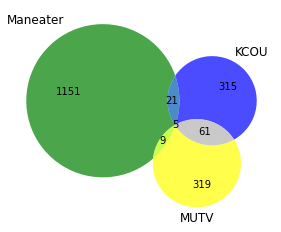

In [712]:
venn3(subsets=(1151, 315, 21, 319, 9, 61, 5), 
      set_labels=('Maneater', 'KCOU', 'MUTV'), 
      set_colors=("green", "blue", "yellow"), alpha=0.7)

## Full Data Merge 2022 CMM

In [1]:
full_data = pd.read_csv('msm_full_alumni_donation_data.csv')

NameError: name 'pd' is not defined

In [5]:
full_data.head()

,FULL_NAME,EMAIL_1,FIRST_NAME,LAST_NAME,NAME_WITH_MIDDLE,EMAIL_2,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,LAST_GIFT_DATE,...,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
0,GRACE SANDS,gcsn8c@mail.missouri.edu,NaN,NaN,NaN,NOEMAIL,True,True,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TARA MORTS,tlmkkm@mail.missouri.edu,NaN,NaN,NaN,NOEMAIL,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,VICTORIA CHEYNE,torircheyne@hotmail.com,NaN,NaN,NaN,NOEMAIL,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHARLES SPERRY,yosquirt@mac.com,NaN,NaN,NaN,NOEMAIL,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WILLIAM TAMMEUS,wtammeus@gmail.com,NaN,NaN,NaN,NOEMAIL,True,False,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
full_data.shape

(1881, 22)

In [15]:
full_data.sort_values(by=['TOTAL_GIVING'],ascending=False).head(15)

,FULL_NAME,EMAIL_1,FIRST_NAME,LAST_NAME,NAME_WITH_MIDDLE,EMAIL_2,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,LAST_GIFT_DATE,...,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
351,CATHERINE SENDERLING-MCDONALD,Csend@cwda.org,CATHERINE,SENDERLING-MCDONALD,CATHERINE E. SENDERLING-MCDONALD,Csend@cwda.org,True,False,False,2/16/22 0:00,...,Masters,No,Sacramento,CA,2375.0,550.0,2150.0,225.0,Tier A (Over $1250),2022.0
1124,MARY BYRNE,NOEMAIL,MARY,BYRNE,MARY ELLEN BYRNE,NOEMAIL,True,False,False,6/16/14 0:00,...,NaN,NaN,NaN,NaN,1500.0,0.0,0.0,1500.0,Tier A (Over $1250),2014.0
357,PATRICK STRAWBRIDGE,pnstrawbridge@gmail.com,PATRICK,STRAWBRIDGE,PATRICK N. STRAWBRIDGE,pnstrawbridge@gmail.com,True,False,False,3/23/21 0:00,...,JD,No,NaN,ME,1000.0,1000.0,1000.0,0.0,Tier B ($600-$1250),2021.0
812,LAUREN HICKEY,laurenhickey@icloud.com,LAUREN,HICKEY,LAUREN ROBINSON HICKEY,laurenhickey@icloud.com,True,False,False,3/24/21 0:00,...,NaN,NaN,NaN,NaN,810.0,100.0,200.0,610.0,Tier B ($600-$1250),2021.0
475,SUZANNE TRAUTMANN-WUNSCH,pwunsch@aol.com,SUZANNE,TRAUTMANN-WUNSCH,SUZANNE GABRIELE TRAUTMANN-WUNSCH,pwunsch@aol.com,True,False,False,11/7/11 0:00,...,NaN,NaN,NaN,NaN,700.0,0.0,0.0,700.0,Tier B ($600-$1250),2011.0
123,PASCALE BISHOP,pascale_bishop@hotmail.com,PASCALE,BISHOP,PASCALE BISHOP,pascale_bishop@hotmail.com,True,False,False,3/30/21 0:00,...,JD,No,Evanston,IL,525.0,25.0,525.0,0.0,Tier C ($200-$599),2021.0
814,JAMES DAVIDSON,jhd@davidsondc.com,JAMES,DAVIDSON,JAMES H. DAVIDSON II,jhd@davidsondc.com,True,False,False,3/31/21 0:00,...,NaN,NaN,NaN,NaN,500.0,500.0,500.0,0.0,Tier C ($200-$599),2021.0
522,MARY ABBOTT,maryluabbott@aol.com,MARY,ABBOTT,MARY LU ABBOTT,maryluabbott@aol.com,True,False,False,6/3/08 0:00,...,NaN,NaN,NaN,NaN,500.0,0.0,0.0,500.0,Tier C ($200-$599),2008.0
1110,THOMAS MORRIS,tem1324@aol.com,THOMAS,MORRIS,THOMAS EDWARD MORRIS,tem1324@aol.com,True,False,False,1/11/16 0:00,...,NaN,NaN,NaN,NaN,500.0,0.0,0.0,500.0,Tier C ($200-$599),2016.0
261,TRAVIS MATHEWS,travis.mathews@gmail.com,TRAVIS,MATHEWS,TRAVIS MATHEWS,travis.mathews@gmail.com,True,False,False,3/24/21 0:00,...,NaN,NaN,NaN,NaN,450.0,250.0,250.0,200.0,Tier C ($200-$599),2021.0


In [14]:
full_data[full_data['FULL_NAME'] =='LAWRENCE SATZ']

,FULL_NAME,EMAIL_1,FIRST_NAME,LAST_NAME,NAME_WITH_MIDDLE,EMAIL_2,MANEATER_ALUM_FLAG,KCOU_ALUM_FLAG,MUTV_ALUM_FLAG,LAST_GIFT_DATE,...,max_degree,MU_max_degree,current_city,current_state,TOTAL_GIVING,cmm_py2,Gift,Scholarship,DONOR_TIER,LAST_GIFT_YEAR
911,LAWRENCE SATZ,lsatz@aol.com,LAWRENCE,SATZ,LAWRENCE JOEL SATZ,lsatz@aol.com,True,True,False,12/29/15 0:00,...,NaN,NaN,NaN,NaN,350.0,0.0,300.0,50.0,Tier C ($200-$599),2015.0
